# Прогноз сердечной недостаточности

Сердечно-сосудистые заболевания (ССЗ) являются причиной смерти номер 1 во всем мире, ежегодно унося около 17,9 миллионов жизней, что составляет 31% всех смертей в мире. Сердечная недостаточность - частое явление, вызываемое сердечно-сосудистыми заболеваниями, и этот набор данных содержит 12 функций, которые можно использовать для прогнозирования смертности от сердечной недостаточности. Большинство сердечно-сосудистых заболеваний можно предотвратить путем устранения поведенческих факторов риска, таких как употребление табака, нездоровое питание и ожирение, недостаточная физическая активность и вредное употребление алкоголя, с использованием стратегий, охватывающих все население. Людям с сердечно-сосудистыми заболеваниями или людям с высоким сердечно-сосудистым риском (из-за наличия одного или нескольких факторов риска, таких как гипертония, диабет, гиперлипидемия или уже установленное заболевание) необходимо раннее выявление и лечение, при этом модель машинного обучения может оказаться очень полезной.\
**Постановка задачи:**\
Создать модель для оценки вероятности смерти от сердечной недостаточности. Это может быть использовано для помощи больницам в оценке степени тяжести пациентов с сердечно-сосудистыми заболеваниями.\
\
*Dataset from Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020).*

## Импорты

In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns    
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier



## Чтение и предобработка данных

В датасете имеется набор параметров, позволяющих оценить вероятность летального исхода от сердечной недостаточности.

In [284]:
heart = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Переменная time обозначает количество дней, которые прошли с момента предыдущего наблюдения.

Проверим типы данных и наличие отсутствующих значений.

In [285]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Видно, что все данные представлены в числовом формате и не имеют пропусков.\
Проверим данные на аномальность:

In [286]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Исследуем целевой столбец:

In [287]:
heart.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Видно, что данные плохо сбалансированны.

Возраст лежит в диапазоне от 40 до 60 лет, показатели анемии, диабета, пола и курения бинарные. Значения лежат в допустимых нормах.

## Разведочный анализ

Нужно посмотреть на графики, выявить тенденции, аномалии и взаимосвязи.

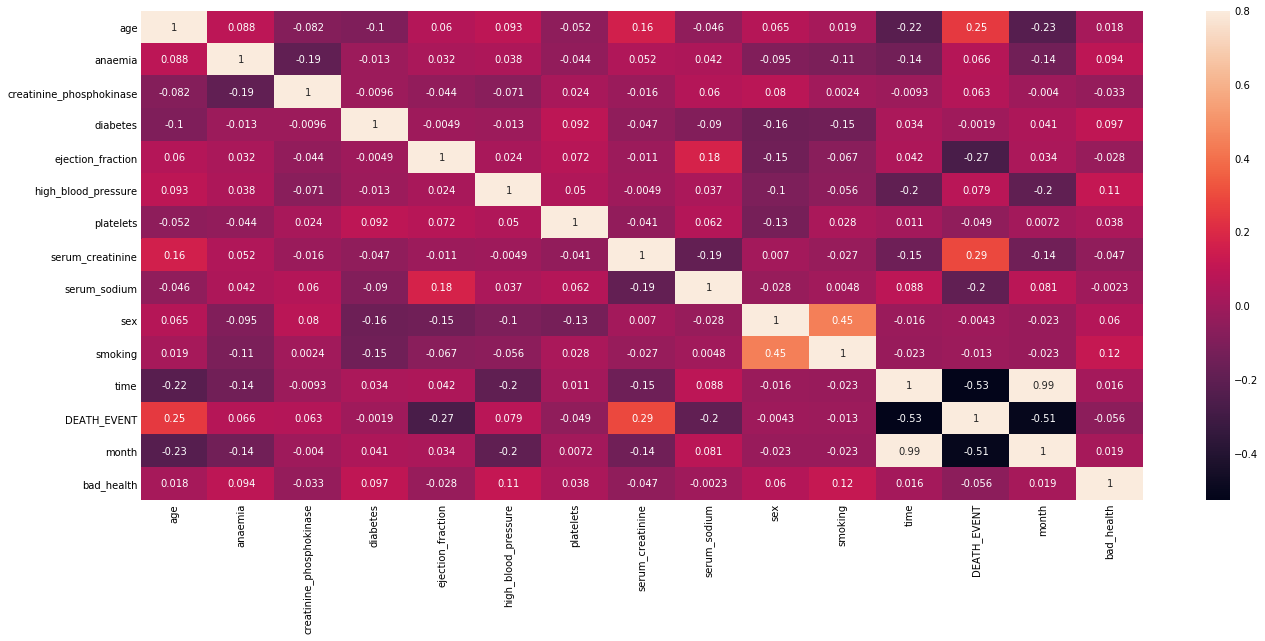

In [353]:
corrmat = heart.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

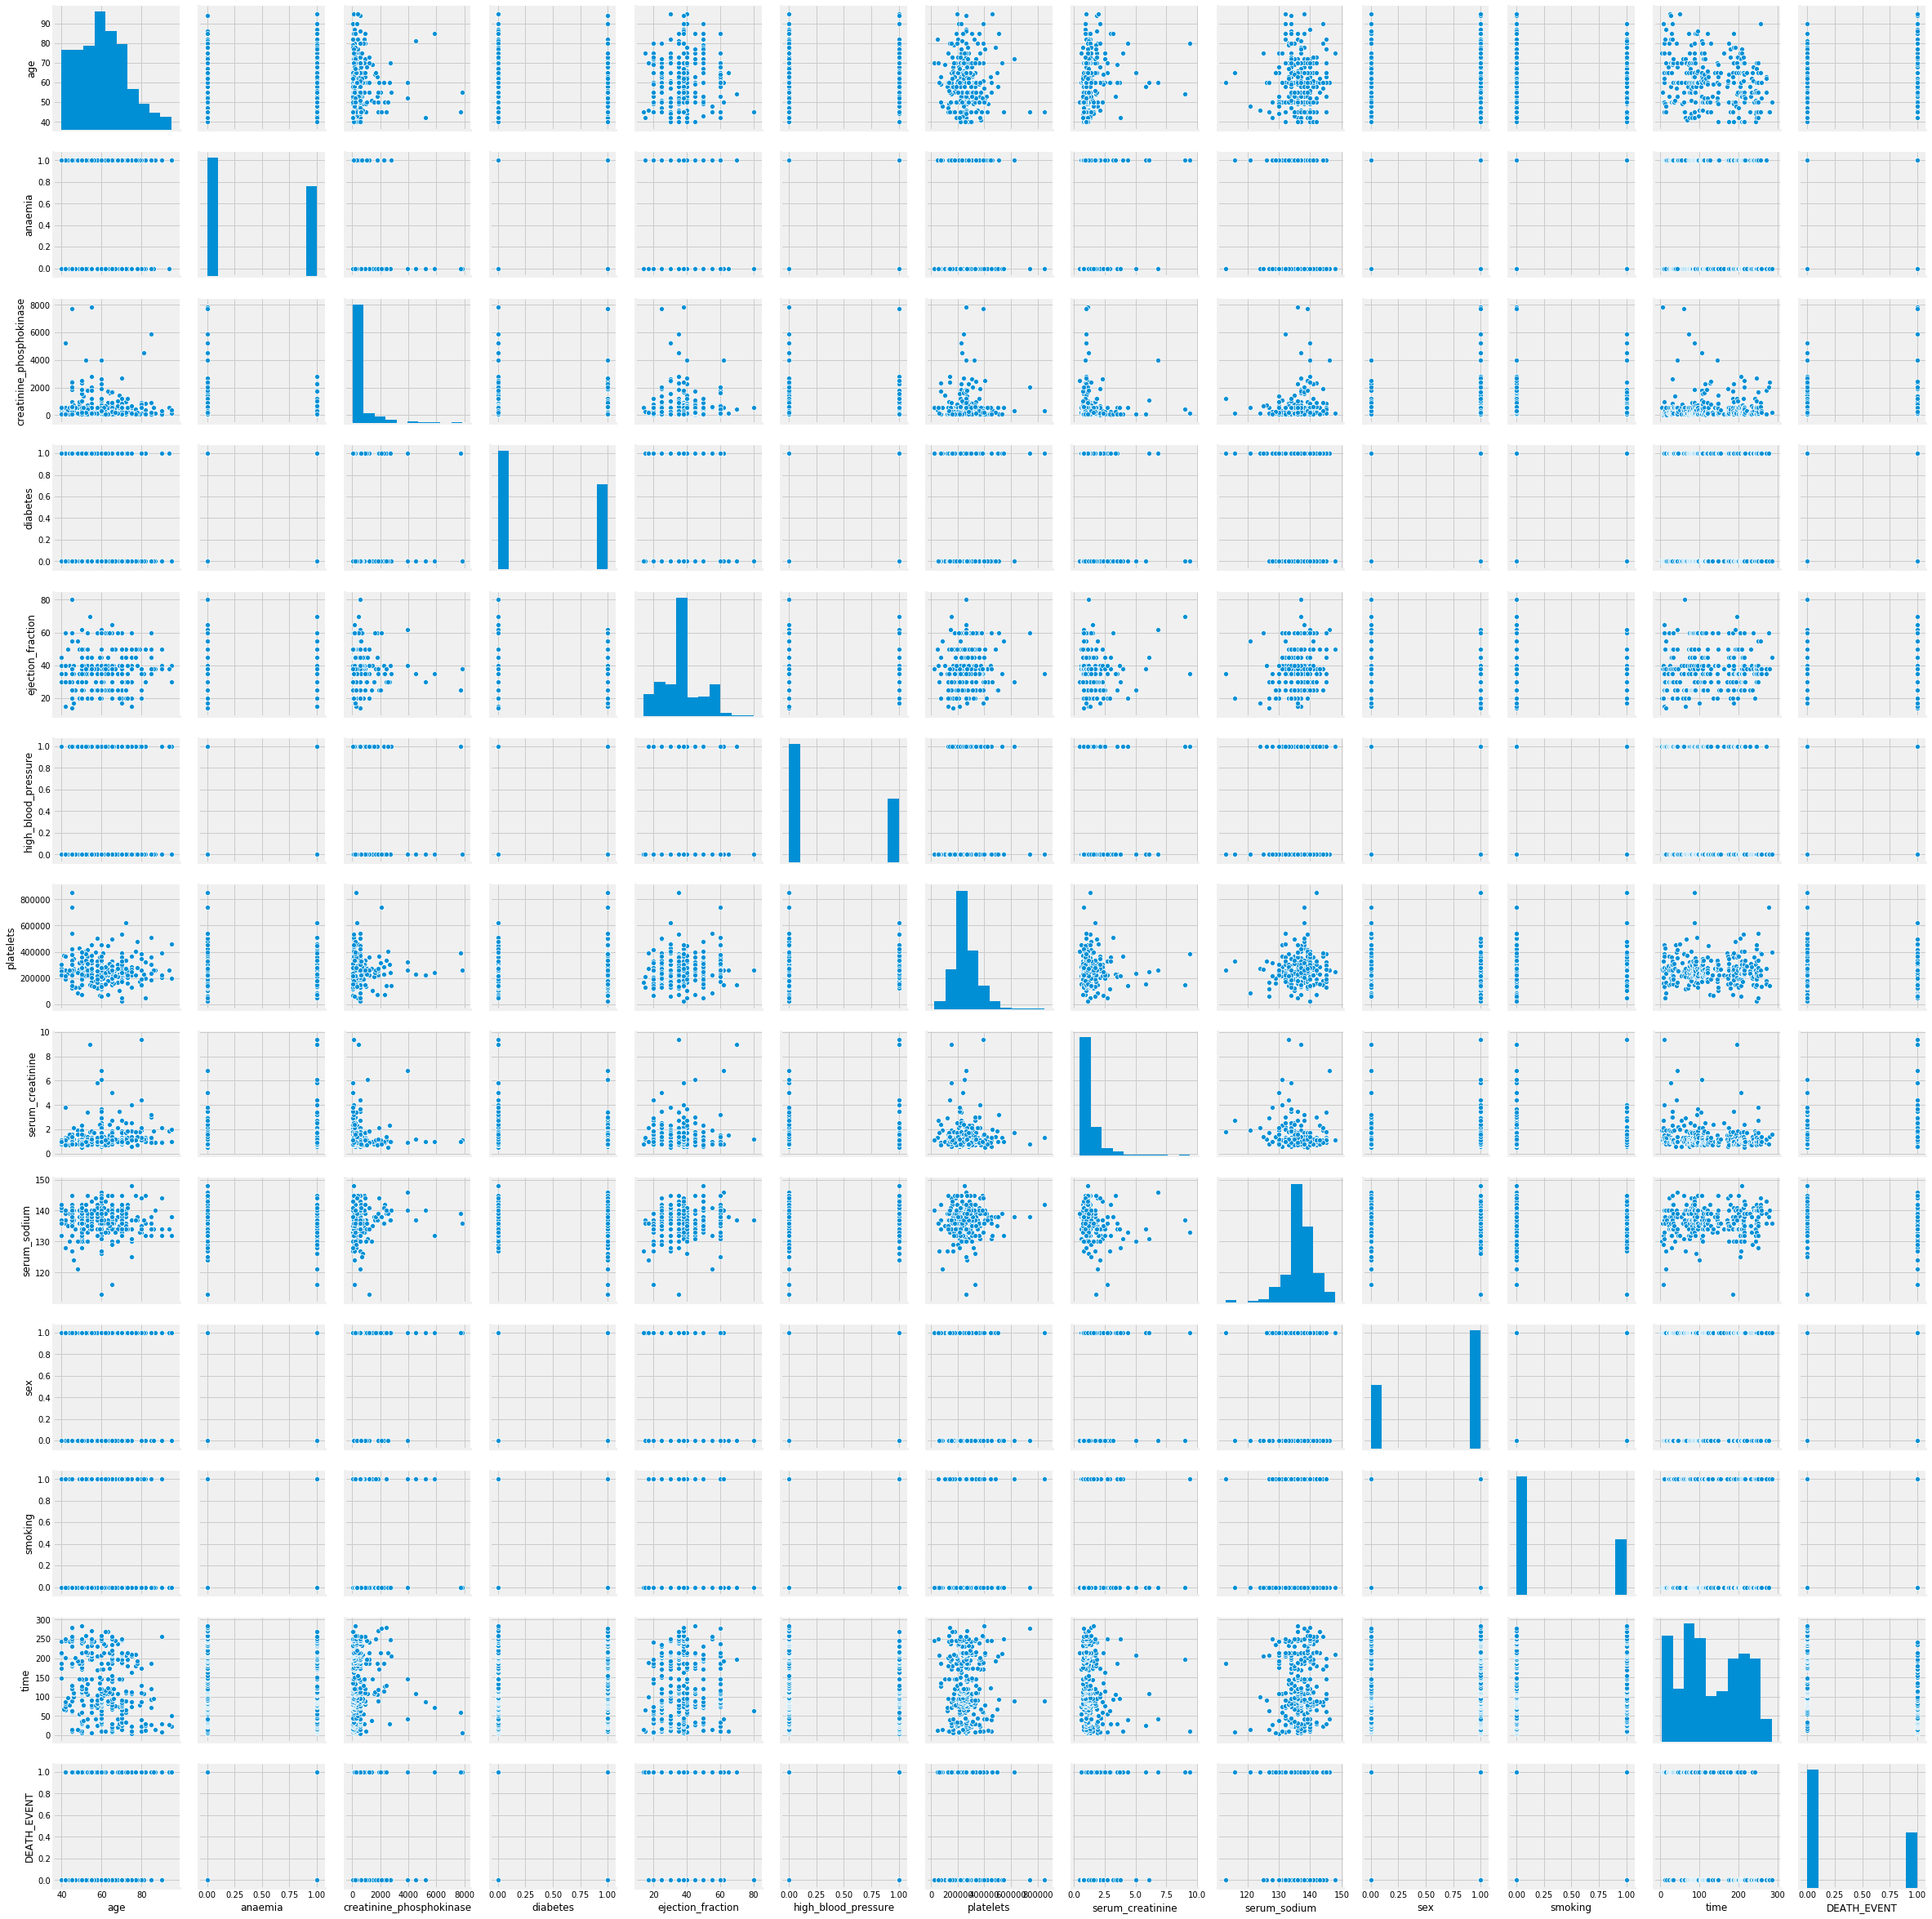

In [289]:
sns.pairplot(heart)

## Генерация признаков

In [312]:
#heart['month'] = heart.time//30

In [373]:
#heart['bad_health'] = np.where( (heart.anaemia == 1) & (heart.diabetes == 1) & \
#                               (heart.high_blood_pressure == 1) & (heart.smoking == 1) ,1,0)

IndentationError: unexpected indent (<ipython-input-373-917bc030871d>, line 2)

Дополнительные признаки не приводят к улучшению качества модели.

Подготовим данные для машинного обучения. Разделим выборки на обучающую и валидационную.

Признаки имеют разные приделы значений, поэтому масштабируем их.

In [354]:
y = heart.DEATH_EVENT

features = heart.drop(['DEATH_EVENT','smoking'], axis=1)
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(features)
X = pd.DataFrame(X_scaled)

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)
print(X_train.shape, X_val.shape)

(89, 13) (210, 12)


## Выбор оптимальной модели

Будем использовать несколько моделей, а затем сравним результаты.\
Важно, чтобы все люди, которые могут умереть были выявлены, поэтому за основную метрику я приняла полноту (recall).

In [356]:
# Функия, которая подставляет модель и оценивает ее эффективность
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_recall = recall_score(y_test, model_pred)
    
    # Return the performance metric
    return model_recall

In [357]:
lr = LogisticRegression()
lr_recall = fit_and_evaluate(lr)

print('Результат Логистической регрессии на тестовом наборе: recall = %0.4f' % lr_recall)

Результат Логистической регрессии на тестовом наборе: recall = 0.4028


In [358]:
tree = DecisionTreeClassifier()
tree_recall = fit_and_evaluate(tree)
print('Результат Решающего дерева на тестовом наборе: recall = %0.4f' % tree_recall)

Результат Решающего дерева на тестовом наборе: recall = 0.5556


In [359]:
random_forest = RandomForestClassifier(random_state = 42)
random_forest_recall = fit_and_evaluate(random_forest)

print('Результат Случайного леса на тестовом наборе: recall = %0.4f' % random_forest_recall)

Результат Случайного леса на тестовом наборе: recall = 0.5556


In [360]:
xgb = XGBClassifier()
xgb_recall = fit_and_evaluate(xgb)

print('Результат XGB на тестовом наборе: recall = %0.4f' % xgb_recall)

Результат XGB на тестовом наборе: recall = 0.5556


In [361]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_recall = fit_and_evaluate(knn)

print('Результат KNN на тестовом наборе: recall = %0.4f' % knn_recall)

Результат KNN на тестовом наборе: recall = 0.2778


Отобразим полученные результаты на графике

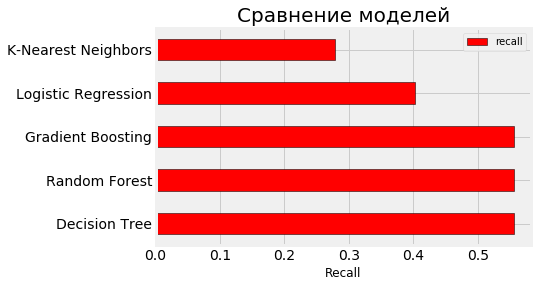

In [362]:
# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Logistic Regression', 'Decision Tree',
                                           'Random Forest', 'Gradient Boosting',
                                            'K-Nearest Neighbors'],
                                 'recall': [lr_recall, tree_recall, random_forest_recall, 
                                         xgb_recall, knn_recall]})

# Horizontal bar chart of test mae
model_comparison.sort_values('recall', ascending = False).plot(x = 'model', y = 'recall', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Recall'); plt.xticks(size = 14)
plt.title('Сравнение моделей', size = 20);

Лучший результат показывает случайный лес.


## Оптимизация гиперпараметров

In [363]:
model = RandomForestClassifier(random_state = 42)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [364]:
params = {
        'n_estimators': [50,150,200,500,1000],
        'criterion' : ['gini', 'entropy'],
        'max_depth': [5,10,20,50],
        'min_samples_split': [1,5,10],
        'min_samples_leaf' : [1, 2],
        'max_features' : ['auto'],          
        }

In [365]:
clf = GridSearchCV(model, params, n_jobs=-1, cv=5, scoring='recall', verbose=3, refit=True)
clf

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [366]:
clf.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  5.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [367]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

In [368]:
best_clf = clf.best_estimator_
best_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [374]:
y_pred = best_clf.predict(X_test)

In [375]:
print('recall =' , recall_score(y_test, y_pred))
print('accuracy =' , accuracy_score(y_test, y_pred))
print('roc auc =' , roc_auc_score(y_test, y_pred))

recall = 0.5694444444444444
accuracy = 0.8142857142857143
roc auc = 0.7557367149758454


## Обработка результатов

Исследуем важность признаков.

In [371]:
importances = best_clf.feature_importances_

feature_list = list(features.columns)

feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})

feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)

feature_results

,feature,importance
0,time,0.281876
1,month,0.234877
2,serum_creatinine,0.144060
3,ejection_fraction,0.119517
4,platelets,0.069002
5,age,0.050321
6,creatinine_phosphokinase,0.042163
7,serum_sodium,0.041444
8,anaemia,0.008862
9,diabetes,0.002996


## Выводы

В работе использовались модели машинного обучения для оценки вероятности смерти пациента от сердечной недостаточности.\
Построено несколько моделей и оценено их качество. 